#### 1. In pseudocode, outline a training routine for a neural network.

To train a neural network in PyTorch, the following steps are usually taken:  

Begin:   

Preprocess input data:
- Load data
- Preprocess data including cleaning, transformation, normalise and etc. 
- Divided the data into training, testing and validation datasets
- Data preparation for training including transformation and batch setting  

Define the network:
- layers with forward functions
- loss functions
- optimiser with proper hyperparameters  

Train the network:  
    
        for i in total epochs:    
            net.train()  
            for train_data, train_label in train_dataset:  
            output calculation  
            loss calculation
            loss backward propagation   
        training loss calculation  
        net validation   
        if i%model save intervales==0:    
            model save 
        print training information   
        end    
End  

#### 2. You have collected data on the growth rate of cancer cells and built a statistical model that fits your acquired data well. What general strategies exist to test your model?

To test the performance of the statistical model, test data is required. I will try to collect more data on the growth rate of cancer cells as test data. If it is challenging to collect new data, I will keep some data out of the fitting process to test the model. 
There are two common ways to test the model. One is to plot the difference between the groundtruth and the predicted results, which can visualise the results and perform residual diagnostics. Another is to define some metrics, such as the R^2 to measure the model's performance.

#### 3. A colleague asks you to make their deep learning model written in Python available to (1) Other peers in the lab and (2) the entire research community:
a. Which technologies do you recommend to the colleague?

I will recommend using Jupyter Notebook or VS Code to write the code and using GitHub to manage the code. Jupyter Notebook supports Python, and it can output the results under each cell. It is convenient to test the classes or functions defined in Python and visualise the middle results. Vs Code is a powerful tool, and it is easy to debug code. I prefer using it for large projects. GitHub is a useful tool for version control and sharing code with others.

b. What solutions exist to ensure that the code is executable and yields
reproducible results?

To ensure the executable of the code， the information of software configuration and compiler will be mentained in the readme documents. In addition, a docker environemnt with proper configurations can also be created to ensure the executable of the code. To produce the reproducible results, besides the codes and software configurations, the input dataset and the seeds for random variables should also be provided. In summary, I prefer using docker to provid the proper software configurations, and in the codes, the input and seeds for the random variables should be provided to ensure the reproducible of the results. In addition, the cache files will be cleaned before share the code with others.

c. What special considerations have to be made before sharing outside of the lab?

In my opinion, there are three aspects that need to be considered:
- Whether there are some confidential parts including the code and dataset that cannot be shared with others
- Whether the code has a violation of the open source agreement
- Whether the code can be maintained to build the high reputation of this work

#####  4. You are given hyperspectral imaging data from an experiment (here represented by the Indian Pines data set from http://lesun.weebly.com/hyperspectral-data-set.html [Download for the data file].
Answer the following questions by writing Python code:   
a. Automatically download the .MAT file from the link (but only if it wasn’t downloaded already) and load it into memory.

In [340]:
import os 
dirs = 'D:\cambridge\Indian_pines_corrected.mat' 
if not os.path.exists(dirs): 
    !wget "http://www.ehu.eus/ccwintco/uploads/6/67/Indian_pines_corrected.mat"

In [341]:
from scipy.io import loadmat
ds_o = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']

b. Save .txt file on the hard drive named “dataset_description.txt”, in which you report descriptive statistics for each of the spectral reflectance bands of the contents of the MAT file.

In [337]:
import pandas as pd
df_o = pd.DataFrame()
for i in range(ds_o.shape[2]):
    df_o = pd.concat([df_o, pd.DataFrame(ds_o[:, :, i].ravel())], axis=1)
df_o.columns = [f'band-{i}' for i in range(1, 1+ds_o.shape[2])]
df_o

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-191,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1135,1094,1090,1112,1090,1062,1069,1057,1020,1020
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1137,1108,1104,1117,1091,1079,1085,1064,1029,1020
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1144,1111,1114,1114,1100,1065,1092,1061,1030,1016
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1146,1122,1108,1109,1109,1071,1088,1060,1030,1006
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1135,1110,1107,1112,1094,1072,1087,1052,1034,1019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21020,2561,3987,4011,4023,4201,4377,4418,4248,4180,3838,...,1021,1013,1012,1018,1015,1011,1001,1000,1009,1008
21021,2726,4104,4024,3880,4210,4377,4413,4174,4229,3900,...,1023,1012,1014,1012,1024,998,1010,1006,1000,1000
21022,3153,3864,4282,3889,4310,4372,4375,4208,4096,3878,...,1020,1016,1015,1016,1021,1008,1019,1003,1008,1000
21023,3155,4104,4106,4027,4139,4318,4413,4174,4140,3933,...,1015,1005,1011,1008,1012,1014,1007,1011,1005,1003


In [217]:
df_o.describe()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-191,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200
count,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,...,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000
mean,2957.363472,4091.321237,4277.502259,4169.956671,4516.678668,4790.595149,4848.317574,4714.732509,4668.904828,4439.065541,...,1079.310773,1061.927848,1060.210273,1063.276813,1050.048514,1040.201141,1043.370321,1030.194816,1015.571463,1008.513579
std,354.918708,230.390005,257.827640,280.761254,346.035984,414.382138,469.247667,491.728349,533.232855,539.908195,...,49.943791,38.843805,38.712195,41.920969,34.242725,26.452672,29.794418,20.865106,11.386402,7.050921
min,2560.000000,2709.000000,3649.000000,2810.000000,3840.000000,4056.000000,4004.000000,3865.000000,3775.000000,2792.000000,...,998.000000,998.000000,999.000000,999.000000,993.000000,990.000000,992.000000,989.000000,986.000000,981.000000
25%,2602.000000,3889.000000,4066.000000,3954.000000,4214.000000,4425.000000,4421.000000,4263.000000,4173.000000,3940.000000,...,1031.000000,1026.000000,1024.000000,1024.000000,1019.000000,1016.000000,1016.000000,1012.000000,1006.000000,1004.000000
50%,2780.000000,4106.000000,4237.000000,4126.000000,4478.000000,4754.000000,4808.000000,4666.000000,4632.000000,4404.000000,...,1068.000000,1053.000000,1052.000000,1054.000000,1043.000000,1033.000000,1035.000000,1026.000000,1014.000000,1009.000000
75%,3179.000000,4247.000000,4479.000000,4350.000000,4772.000000,5093.000000,5198.000000,5100.000000,5084.000000,4860.000000,...,1129.000000,1099.000000,1098.000000,1104.000000,1083.000000,1066.000000,1072.000000,1050.000000,1024.000000,1014.000000
max,4536.000000,5744.000000,6361.000000,6362.000000,7153.000000,7980.000000,8284.000000,8128.000000,8194.000000,7928.000000,...,1364.000000,1287.000000,1289.000000,1315.000000,1258.000000,1201.000000,1245.000000,1167.000000,1076.000000,1036.000000


In [218]:
dataset_description = open('dataset_description.txt', 'w')
dataset_description.write(df_o.describe().T.to_string())
dataset_description.close()

c. Display the multispectral image at the first, center, and last band.

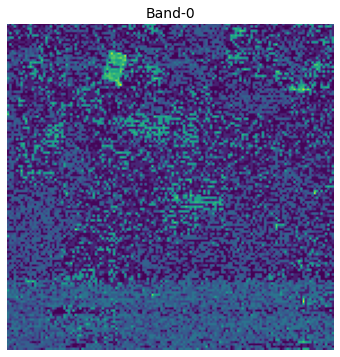

In [236]:
import numpy as np
import matplotlib.pyplot as plt

def plot_band(dataset,band):
    plt.figure(figsize=(8, 6))
    band_no = band
    plt.imshow(dataset[:,:, band_no], cmap='viridis')
    plt.title(f'Band-{band_no}', fontsize=14)
    plt.axis('off')
    plt.show()

plot_band(ds_o, 0)

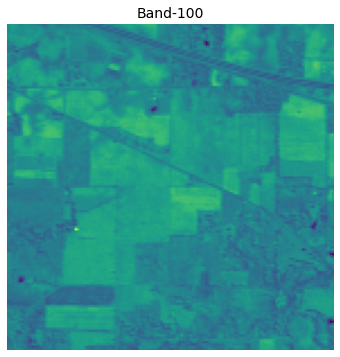

In [237]:
plot_band(ds_o, 100)

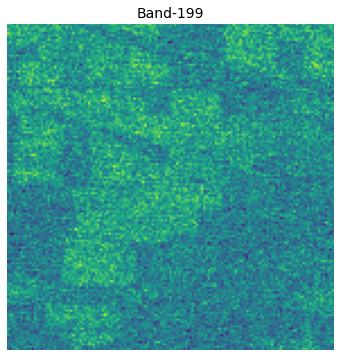

In [238]:
plot_band(ds_o, 199)

d. Perform a principal component analysis of the data and plot  
  i. a scatter plot with the second versus the third principal component.

In [302]:
def standardisation(data):
    mu = np.mean(data)
    sigma = np.std(data)
    return (data - mu) / sigma

ds_norm = standardisation(ds_o)

(145, 145, 200)

In [331]:
df_norm = pd.DataFrame()
for i in range(ds_norm.shape[2]):
    df_norm = pd.concat([df_norm, pd.DataFrame(ds_norm[:, :, i].ravel())], axis=1)
df_norm.columns = [f'band-{i}' for i in range(1, 1+ds_norm.shape[2])]
df_norm.head(21025)

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-191,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200
0,0.326319,0.935485,1.164080,1.021522,1.337410,1.504459,1.608080,1.540884,1.507599,1.317313,...,-0.952930,-0.978679,-0.981191,-0.967374,-0.981191,-0.998775,-0.994379,-1.001915,-1.025151,-1.025151
1,-0.045461,1.013358,1.161568,1.113839,1.381998,1.630689,1.695373,1.696001,1.692233,1.515135,...,-0.951674,-0.969886,-0.972398,-0.964234,-0.980563,-0.988099,-0.984331,-0.997519,-1.019499,-1.025151
2,0.649742,1.013358,1.110699,1.159056,1.486247,1.658321,1.749382,1.742474,1.714841,1.557212,...,-0.947278,-0.968002,-0.966118,-0.966118,-0.974911,-0.996891,-0.979935,-0.999403,-1.018871,-1.027663
3,0.060672,1.008334,1.224996,1.155916,1.447939,1.621269,1.736194,1.697257,1.693489,1.534604,...,-0.946022,-0.961094,-0.969886,-0.969258,-0.969258,-0.993123,-0.982447,-1.000031,-1.018871,-1.033943
4,0.058788,0.857613,1.270213,1.108187,1.402722,1.547792,1.609336,1.534604,1.535860,1.370066,...,-0.952930,-0.968630,-0.970514,-0.967374,-0.978679,-0.992495,-0.983075,-1.005055,-1.016359,-1.025779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21020,-0.057393,0.838144,0.853217,0.860753,0.972538,1.083067,1.108815,1.002054,0.959350,0.744571,...,-1.024523,-1.029547,-1.030175,-1.026407,-1.028291,-1.030803,-1.037083,-1.037711,-1.032059,-1.032687
21021,0.046228,0.911621,0.861381,0.770948,0.978190,1.083067,1.105675,0.955582,0.990122,0.783508,...,-1.023267,-1.030175,-1.028919,-1.030175,-1.022639,-1.038967,-1.031431,-1.033943,-1.037711,-1.037711
21022,0.314387,0.760900,1.023406,0.776600,1.040990,1.079927,1.081811,0.976934,0.906597,0.769692,...,-1.025151,-1.027663,-1.028291,-1.027663,-1.024523,-1.032687,-1.025779,-1.035827,-1.032687,-1.037711
21023,0.315643,0.911621,0.912877,0.863265,0.933601,1.046015,1.105675,0.955582,0.934229,0.804232,...,-1.028291,-1.034571,-1.030803,-1.032687,-1.030175,-1.028919,-1.033315,-1.030803,-1.034571,-1.035827


In [306]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(df_norm)
print(pca.explained_variance_ratio_)
print(pca.n_features_)
print(pca.n_samples_)

[0.68493799 0.23531371 0.01496355 0.00821542 0.00695011 0.00517011]
200
21025


In [307]:
pcs = pca.fit_transform(df_norm)
pcs_df = pd.DataFrame(data = pcs
              , columns = ['PC-1','PC-2', 'PC-3', 'PC-4', 'PC-5','PC-6'])

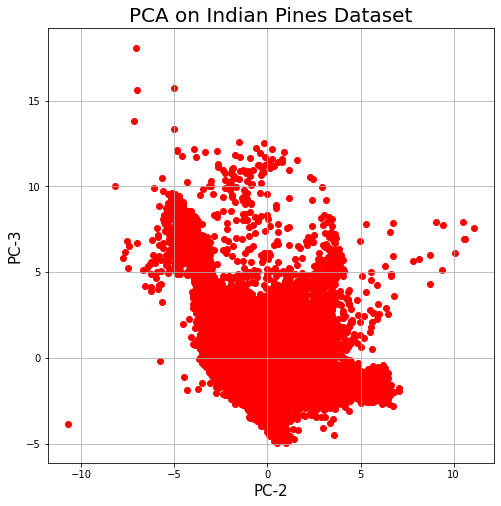

In [308]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC-2', fontsize = 15)
ax.set_ylabel('PC-3', fontsize = 15)
ax.set_title('PCA on Indian Pines Dataset', fontsize = 20)
ax.scatter(pcs_df.loc[:,'PC-2'], principalDf.loc[:,'PC-3'], c = 'r')
ax.grid()
plt.show()

ii. An image of the scene colour coded with the magnitude of the first principal component. What does this image show?   

Answer: The first principal component extracts the maximum variance of the input variables. Therefore, this image could be treated as the most representative image extracted from the hyperspectral image. In other words, this image is the most representative feature extracted by PCA.

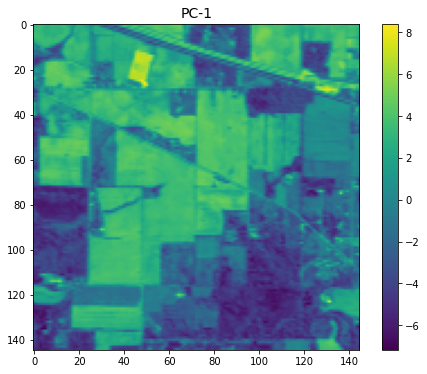

In [318]:
pcs_df_3D = pcs_df.values.reshape(145,145,6)
plt.figure(figsize=(8, 6))
plt.imshow(pcs_df_3D[:,:, 0], cmap='viridis')
plt.title('PC-1', fontsize=14)
plt.colorbar()
plt.show()

e. Perform k-means clustering of the data with k=16 classes and visualise the
resulting scene classification.  
i. How do the results change if you normalise the input spectra
individually to unit norm before performing the clustering? How do you
interpret the results?  

Answer: If I normalise the input spectrum individually rather than globally, a more accurate result is obtained. There are 200 bands in the hyperspectral image. The data distribution and noise are different over different bands. In this work, only the basic PCA and kmeans are used, and they are sensitive to variable values. Therefore, normalising the input spectrum individually is expected in this scenario. 

In [312]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=16, max_iter=1000, random_state=0)
kmeans.fit(pcs_df)

KMeans(max_iter=1000, n_clusters=16, random_state=0)

In [334]:
scene_classification = kmeans.labels_.reshape(145,145)

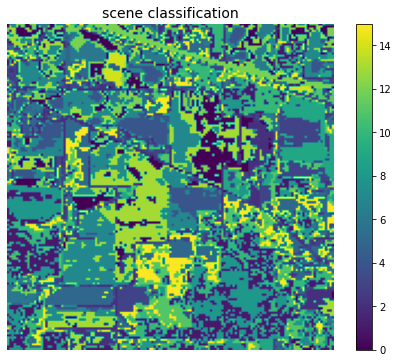

In [335]:
plt.figure(figsize=(8, 6))
plt.imshow(scene_classification, cmap='viridis')
plt.title('scene classification', fontsize=14)
plt.axis('off')
plt.colorbar()
plt.show()

In [338]:
def standardisation_individually(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

df_norm_idv = standardisation_individually(df_o)
df_norm_idv

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-191,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200
0,0.604763,0.219975,0.886263,0.388394,0.766763,0.621192,0.777183,0.795717,0.720331,0.575916,...,1.115065,0.825689,0.769536,1.162291,1.166742,0.824090,0.860238,1.284720,0.388941,1.629106
1,-1.063264,0.758205,0.870749,0.911983,0.971949,1.106263,1.073408,1.298039,1.271698,1.159363,...,1.155111,1.186116,1.131188,1.281565,1.195946,1.466762,1.397264,1.620216,1.179377,1.629106
2,2.055834,0.758205,0.556578,1.168434,1.451679,1.212448,1.256685,1.448532,1.339213,1.283461,...,1.295271,1.263350,1.389511,1.210000,1.458782,0.937503,1.632213,1.476432,1.267203,1.061790
3,-0.587088,0.723481,1.262493,1.150625,1.275393,1.070064,1.211931,1.302107,1.275449,1.216781,...,1.335317,1.546542,1.234517,1.090726,1.721618,1.164328,1.497956,1.428504,1.267203,-0.356498
4,-0.595541,-0.318256,1.541756,0.879926,1.067317,0.787709,0.781445,0.775380,0.804724,0.731502,...,1.115065,1.237605,1.208685,1.162291,1.283558,1.202132,1.464392,1.045080,1.618507,1.487277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21020,-1.116799,-0.452814,-1.033670,-0.523435,-0.912293,-0.998125,-0.917059,-0.949190,-0.916891,-1.113300,...,-1.167556,-1.259635,-1.245381,-1.080077,-1.023556,-1.103928,-1.422123,-1.447179,-0.577146,-0.072840
21021,-0.651893,0.055033,-0.983247,-1.032776,-0.886283,-0.998125,-0.927715,-1.099683,-0.824997,-0.998463,...,-1.127510,-1.285380,-1.193716,-1.223207,-0.760720,-1.595383,-1.120046,-1.159610,-1.367581,-1.207471
21022,0.551228,-0.986704,0.017445,-1.000720,-0.597289,-1.010191,-1.008697,-1.030538,-1.074425,-1.039212,...,-1.187579,-1.182401,-1.167884,-1.127787,-0.848332,-1.217340,-0.817969,-1.303394,-0.664972,-1.207471
21023,0.556863,0.055033,-0.665198,-0.509187,-1.091469,-1.140509,-0.927715,-1.099683,-0.991907,-0.937340,...,-1.287694,-1.465593,-1.271213,-1.318627,-1.111168,-0.990515,-1.220738,-0.919970,-0.928451,-0.781984


In [336]:
pcs_idv = pca.fit_transform(df_norm_idv)
pcs_df_idv = pd.DataFrame(data = pcs_idv
              , columns = ['PC-1','PC-2', 'PC-3', 'PC-4', 'PC-5','PC-6'])
pcs_df_idv

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6
0,10.573985,4.212713,0.188368,-0.453512,0.708529,-1.269552
1,13.157707,-1.954412,0.154367,1.221876,1.546594,-0.789833
2,14.070350,-3.843906,0.100992,2.504653,1.606243,-1.248745
3,13.356123,-2.583363,0.308769,1.442995,1.720051,-0.683603
4,11.591195,1.749463,0.002845,-0.556080,1.187321,-0.981361
...,...,...,...,...,...,...
21020,-15.514348,-4.838841,0.529420,-0.048071,1.307610,-0.062788
21021,-15.768537,-4.998443,0.569088,-0.308621,1.134980,-0.215383
21022,-15.303884,-3.544000,0.641085,-0.163503,1.146885,-0.295452
21023,-15.375710,1.140700,1.321091,0.151765,-0.056909,-1.068289


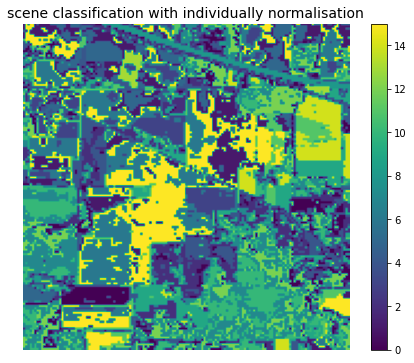

In [339]:
kmeans_idv = KMeans(n_clusters=16, max_iter=1000, random_state=0)
kmeans_idv.fit(pcs_df_idv)
scene_classification_idv = kmeans_idv.labels_.reshape(145,145)
plt.figure(figsize=(8, 6))
plt.imshow(scene_classification_idv, cmap='viridis')
plt.title('scene classification with individually normalisation', fontsize=14)
plt.axis('off')
plt.colorbar()
plt.show()